# TME3: introduction à Numpy

> Consignes: le fichier TME3_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en TME3_nom1_nom2.ipynb.

## Exercice 1: 
Implémenter les exemples vu en TD. Imprimer les tableaux résultats pour vérification. 

In [1]:
from PIL import Image
import numpy as np

## Exercice 2: Numpy et les images

### 2.1 Normalisation
Normaliser l'image `img/seiche.png`. Indication: utiliser les méthodes `min()` et `max()` de la classe `ndarray`. Afficher l'image PIL `seiche.png` puis le tableau numpy normalisé. Ps: si l'image numpy apparait colorée, utiliser la fonction gray() qui fixe la palette de couleurs d'`imshow()` en niveaux de gris.

<Figure size 432x288 with 0 Axes>

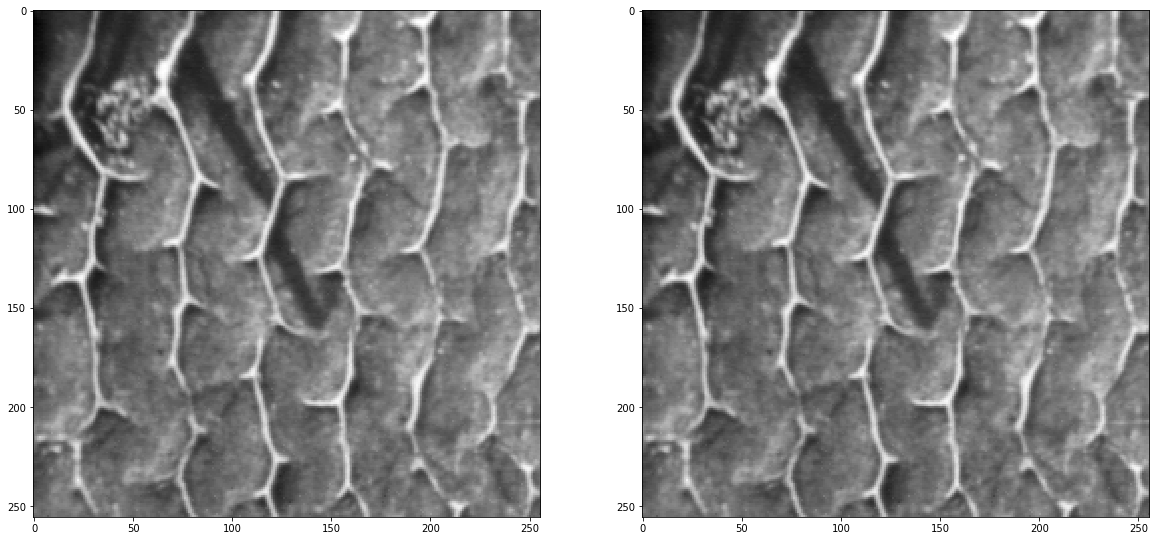

In [16]:
from PIL import Image
from pylab import *

seiche = Image.open("img/seiche.png")
seiche_normalise = np.array(seiche)

seiche_normalise = (seiche_normalise - seiche_normalise.min())/seiche_normalise.max()

gray()
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(seiche)
plt.subplot(122)
plt.imshow(seiche_normalise)

### 2.2 Visualisation PIL et Numpy
Lire l'image `img/CT-scan.png` (une coupe d'une acquisition d'un scanner X d'un corps humain) avec PIL et sa classe `Image`. Imprimer les extremas de l'image et l'image PIL. Transformer-là en tableau Numpy. A nouveau afficher ce tableau sous forme d'image. Que constatez-vous ?

taille :  (512, 512)  mode :  I  Extrema :  (0, 2244)


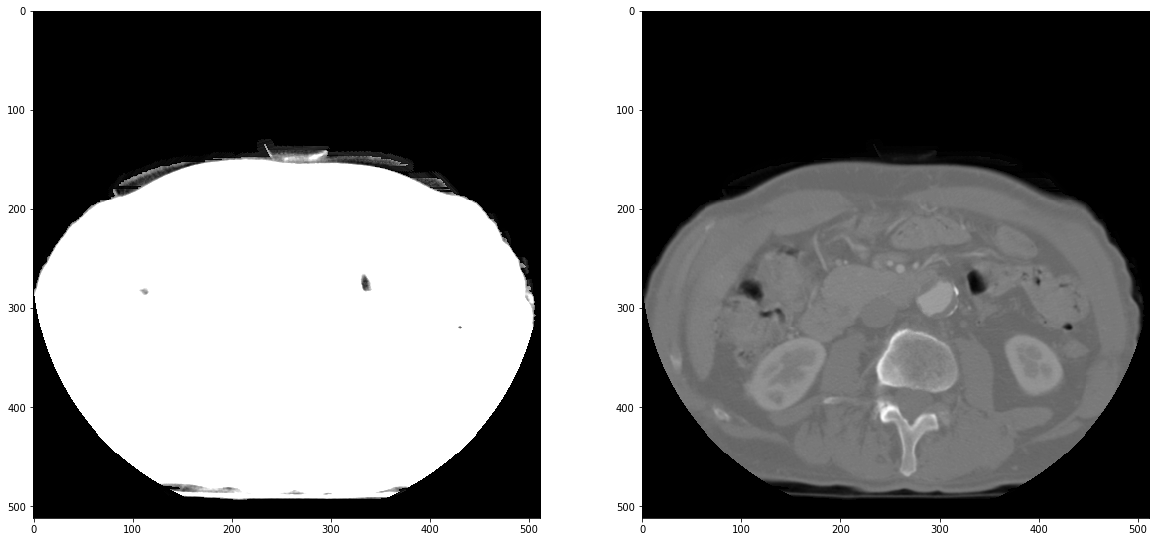

In [28]:
ct = Image.open("img/CT-scan.png")
print("taille : ", ct.size, " mode : ", ct.mode, " Extrema : " ,ct.getextrema())

ct_np = np.array(ct)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(ct)
plt.subplot(122)
plt.imshow(ct_np)

### 2.3 Seuillage
Prendre le tableau numpy de la question précédente. Appliquer un seuillage haut au seuil 255. 
Remarque: cette opération se fait une instruction Python. Afficher le résultat sous forme d'image et comparer avec l'image PIL affichée à la question précédente. Qu'en déduisez vous du comportement de imshow() sur les images PIL ?

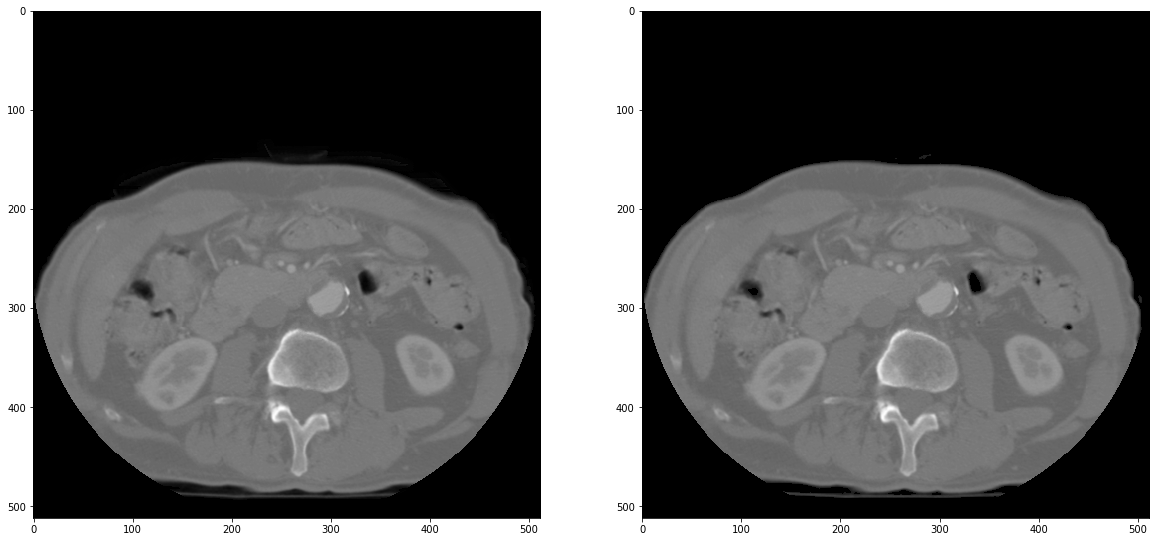

In [31]:
ct_np_copy = np.copy(ct_np)

ct_np_copy[ ct_np_copy <= 255 ] = 0

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(ct_np)
plt.subplot(122)
plt.imshow(ct_np_copy)

### 2.4 Seuillage - suite
Sur la même image, appliquer un seuillage à 1000 et commenter la visualisation de l'image seuillée. Essayer d'autres valeurs de seuils pour différentier certains organes.


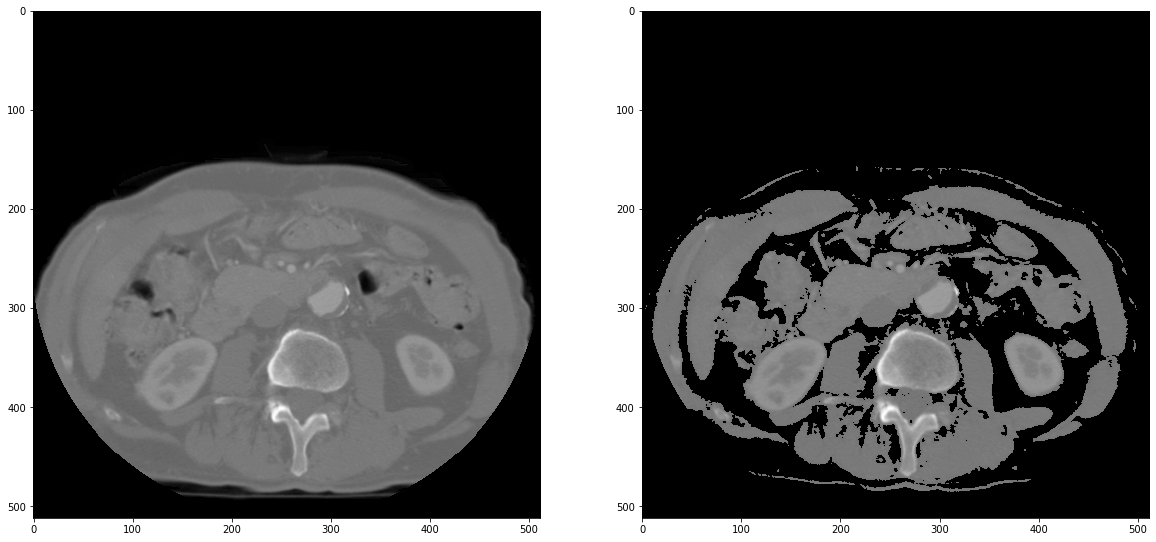

In [44]:
ct_np_copy = np.copy(ct_np)

ct_np_copy[ ct_np_copy <= 1000] = 0

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(ct_np)
plt.subplot(122)
plt.imshow(ct_np_copy)

### 2.4 Damier
Comment fabriquer un image qui représente un damier (alternance de 6 cases blanches et 6 cases noires en ligne et en colonne), chaque case étant de taille 20 par 20. On pourra utiliser les fonctions `hstack()`, `vstack()` et `tile()`.

(240, 240)


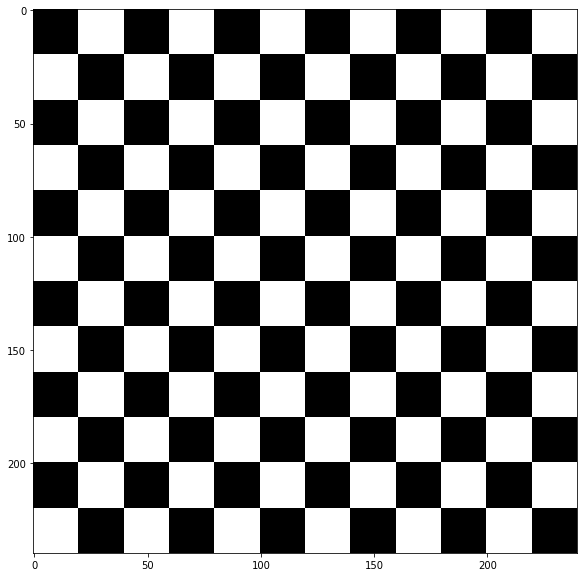

In [73]:
case_blanche = np.tile(1,400).reshape(20,20)
case_noir = np.tile(0,400).reshape(20,20)

np.vstack((case_noir, case_blanche))
np.vstack((case_blanche, case_noir))

damier = np.tile(np.hstack((np.vstack((case_noir, case_blanche)),
                            np.vstack((case_blanche, case_noir)))), (6,6)) 


print(damier.shape)
plt.figure(figsize=(20,10))
plt.imshow(damier)

## Exercice 3: Manipulation et parcours de tableaux
### 3.1 Permutation de colonnes
Écrire un code Python qui créé un tableau `A` initialisé à des valeurs quelconque, ou bien une image lue sur le disque, construit un tableau `B` de même taille qui contient en première colonne la dernière colonne de `A`, et pour ses colonnes restantes, les premières colonnes de `A`. 


In [92]:
A = np.random.uniform(size=(2,2))
B = np.empty_like(A)
B[:, 0] = A[:, -1]
B[:,1:] = A[:, 0:-1]
print(A.shape)
print(A, "\n" ,B)

(2, 2)
[[0.58277902 0.79251747]
 [0.23361125 0.37322186]] 
 [[0.79251747 0.58277902]
 [0.37322186 0.23361125]]


### 3.2 Duplication de lignes et colonnes
Écrire un code Python qui prend le même tableau `A`, créé un tableau `A2` ayant 2 lignes et deux colonnes de plus que `A` et telque :
 - `A2` privé de ses premières et dernières lignes et colonnes doit valoir `A`. 
 - Les bords de `A2` doivent correspondre aux bords de `A`. Les valeurs aux coins de A2 ne devraient pas vous poser de problème !


### 3.3 Temps de calcul
Reprendre l'exercice 2 du TME2 en utilisant Numpy: calculer les extremas d'un tableau numpy (de grande taille, par exemple l'image `../TME2/img/genies-math.jpg` convertie en niveaux de gris), en parcourant par indice les valeurs du tableau. Puis utiliser les méthodes `min()` et `max()`. Chronométrer les temps grâce aux fonctions `tic()` et `tac()`. Discuter ces temps.

In [2]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

###
